In [ ]:
import sys
from CoRe_Dataloader_ECSG import *
from CoRe_Dataloader_From_File_With_Random_From_Tensors import *
import torch
import numpy as np
import matplotlib.pyplot as plt
import plotly as pt 
import plotly.graph_objects as go 
from  watpy.coredb.coredb import *
cdb = CoRe_db("./CoRe_DB/")


In [216]:
# create a function to create a layout for plotly after taking in the x axes title, y axes title, and plot title 
def get_layout(xtitle: str, ytitle: str, title: str, height: int, width: int) -> go.Layout:
    primary_color = rgba(133, 162, 204)
    secondary_color = rgba(168, 217, 255)
    grid_color = rgba(83, 107, 126)
    return go.Layout(
        title=dict(text=title,
                   font=dict(size=90*1.2, family="Verdana",color=primary_color),
                   y = .98,
        ),
        xaxis=dict(title=dict(text=xtitle, font=dict(size=60*1.3, family="Verdana", color=secondary_color)),
                    showline=False,
                    linewidth=2,
                    linecolor=grid_color,
                    mirror=True,
                    showgrid=True,
                    gridwidth=2,
                    gridcolor=grid_color,
                    ),
        yaxis=dict(title=dict(text=ytitle, font=dict(size=60*1.3, family="Verdana", color=secondary_color)),
                    showline=False,
                    linewidth=2,
                    linecolor=grid_color,
                    mirror=True,
                    showgrid=True,
                    gridwidth=2,
                    gridcolor=grid_color,
                    ),
        showlegend=True,
        legend=dict(
                    font=dict(size=40*1.8, family="Verdana",color=secondary_color),
                    itemwidth = 90,
                    itemsizing = "constant",
                    orientation = "h",
                    xanchor = "center",
                    yanchor = "top",
                    x = .5,
                    y = 1
                    ),
        margin = dict(t = 150),
        font=dict(size=25*1.3, family="Verdana", color=secondary_color),
        width=width,
        height=height,
        plot_bgcolor=rgba(0,0,0,255),
        paper_bgcolor=rgba(0,0,0,255),
    )
def pplt(data: List[object], xtitle: str = "XTITLE the quick brown fox jumped over the lazy dog", ytitle: str = "YTITLE the quick brown fox jumped over the lazy dog", title: str = "PLOTTITLE the quick brown fox jumped over the lazy dog", height: int = -1, width: int = -1):
    fig = go.Figure(data=data, layout=get_layout(xtitle, ytitle, title, height, width))
    return fig
def rgba(r:int = 0,g:int = 0,b:int = 0,a:int = 255) -> str:
    return f"rgba({r},{g},{b},{a})"

In [217]:
example_total_data = cdb.sim["THC:0087"].run["R01"].data.read("rh_22").T

In [218]:
initial_time = example_total_data[0]*4.975e-6
initial_rstr = example_total_data[1]
initial_istr = example_total_data[2]
initial_ener = (example_total_data[1]**2 + example_total_data[2]**2)

In [219]:
postmerger_rstr = cut_at_lowest_envelope(initial_rstr, initial_istr)
postmerger_time = initial_time[-len(postmerger_rstr):]
postmerger_rstr.shape, postmerger_time.shape


((3694,), (3694,))

In [220]:
lts = len(postmerger_time)

In [221]:
window = planck_window(math.floor(math.log(lts/2)*6), lts+2)
windowx = np.linspace(0, len(window), len(window))

In [222]:
post_planck_rstr = np.multiply(postmerger_rstr, window,)

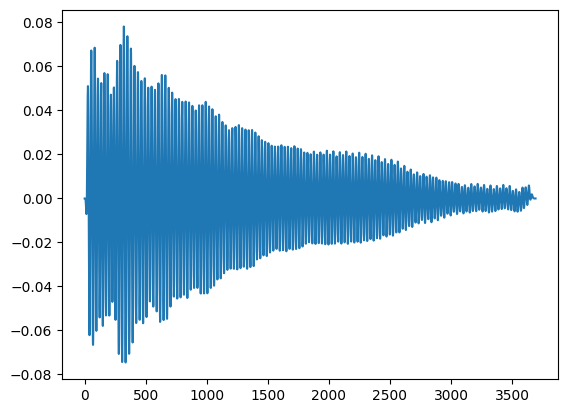

In [223]:
plt.plot(post_planck_rstr)

In [224]:
postmerger_time

array([0.00725279, 0.00725708, 0.00726138, ..., 0.0230998 , 0.02310409,
       0.02310839])

In [225]:
from scipy import signal
morlet = signal.morlet(1000,w=10,s = .6)

In [226]:
sam_p = (postmerger_time[-1] - postmerger_time[0])/len(postmerger_time)


In [227]:
postmerger_awt = pad_width(wt(postmerger_rstr, sam_p))


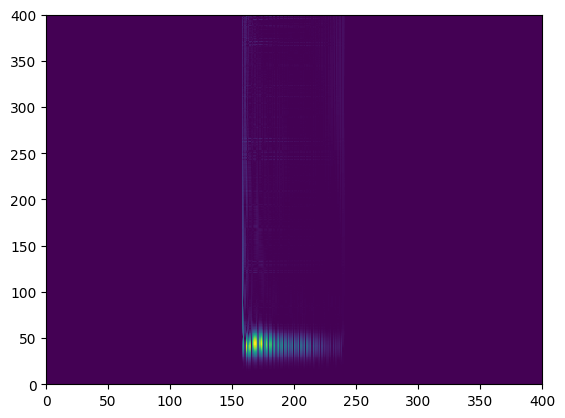

In [228]:
plt.pcolormesh(postmerger_awt)

In [229]:
noised = np.random.normal(loc = 0,scale = 0.001/3.5, size = (400,400)) + postmerger_awt

In [232]:
fig = pplt(
    [
        # go.Heatmap(z=noised, colorscale="Ice",
        #            colorbar=dict(title='Energy')),

        go.Scatter(x=initial_time, y=initial_rstr, name="Complete Merger Waveform", line=dict(
            width=8, color=rgba(255, 255, 255))),
        go.Scatter(x=postmerger_time, y=postmerger_rstr, name="Postmerger Only Waveform", line=dict(
            width=8, color=rgba(140, 255, 205))),
        go.Scatter(x=initial_time, y=initial_ener, name="Total Waveform Energy", line=dict(
            width=8, color=rgba(255, 205, 255))),

    ],
    height=1500,
    width=7500, title="Strain Vs. Time [THC:0087]", ytitle="Strain", xtitle="Time [ms]")
fig.update_yaxes(range=[-.25, .25])
fig.show()
